<a href="https://colab.research.google.com/github/Khislatz/DS-Unit-1-Build/blob/master/Khislat_Zhuraeva_Medical_Cost_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded = files.upload()  #source https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset

Saving sample-insurance-claim-prediction-dataset.zip to sample-insurance-claim-prediction-dataset.zip


In [0]:
!unzip sample-insurance-claim-prediction-dataset.zip

Archive:  sample-insurance-claim-prediction-dataset.zip
  inflating: insurance2.csv          
  inflating: insurance3r2.csv        


1.  **AGE:** Age of a primary beneficiary 
2.  **SEX:** Gender 
3. **BMI:** Body mass index
4. **CHILDREN:** The number of children covered by health insurance / number of dependents
5. **SMOKER:** Yes or No
6. **REGION:** The beneficiary's residential area in the US: northeast = 0,northwest = 1, southeast = 2, southwest = 3 
7. **CHARGES:** Individual medical cost billed by insurance 






In [0]:
#insurance dataset 
insurance1_df = pd.read_csv('insurance3r2.csv')
insurance1_df.head()

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [0]:
insurance1_df.shape

(1338, 9)

In [0]:
insurance1_df.isnull().sum() #no NaNs 

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64

In [0]:
insurance1_df.columns

Index(['age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'region', 'charges',
       'insuranceclaim'],
      dtype='object')

In [0]:
insurance_df = insurance1_df.drop(['insuranceclaim'], axis=1)
insurance_df.head() #dropping columns we won't need 

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,3009,0,1,3,16884.92400
1,18,1,33.770,3008,1,0,2,1725.55230
2,28,1,33.000,3009,3,0,2,4449.46200
3,33,1,22.705,10009,0,0,1,21984.47061
4,32,1,28.880,8010,0,0,1,3866.85520


In [0]:
insurance_df.head()

,age,sex,bmi,steps,children,smoker,region,charges
0,19,0,27.900,3009,0,1,3,16884.92400
1,18,1,33.770,3008,1,0,2,1725.55230
2,28,1,33.000,3009,3,0,2,4449.46200
3,33,1,22.705,10009,0,0,1,21984.47061
4,32,1,28.880,8010,0,0,1,3866.85520


In [0]:
insurance_df.shape

(1338, 8)

In [0]:
insurance_df.to_csv(r'C:\Users\Khisl\Documents\Medical_Cost_Project.csv')
print(insurance_df)


      age  sex     bmi  steps  children  smoker  region      charges
0      19    0  27.900   3009         0       1       3  16884.92400
1      18    1  33.770   3008         1       0       2   1725.55230
2      28    1  33.000   3009         3       0       2   4449.46200
3      33    1  22.705  10009         0       0       1  21984.47061
4      32    1  28.880   8010         0       0       1   3866.85520
...   ...  ...     ...    ...       ...     ...     ...          ...
1333   50    1  30.970   4008         3       0       1  10600.54830
1334   18    0  31.920   3003         0       0       0   2205.98080
1335   18    0  36.850   3008         0       0       2   1629.83350
1336   21    0  25.800   8009         0       0       3   2007.94500
1337   61    0  29.070   8008         0       1       1  29141.36030

[1338 rows x 8 columns]


In [0]:
insurance_df['age'].sort_values(ascending=True).unique() #how many different unique age we have 


array([18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64])

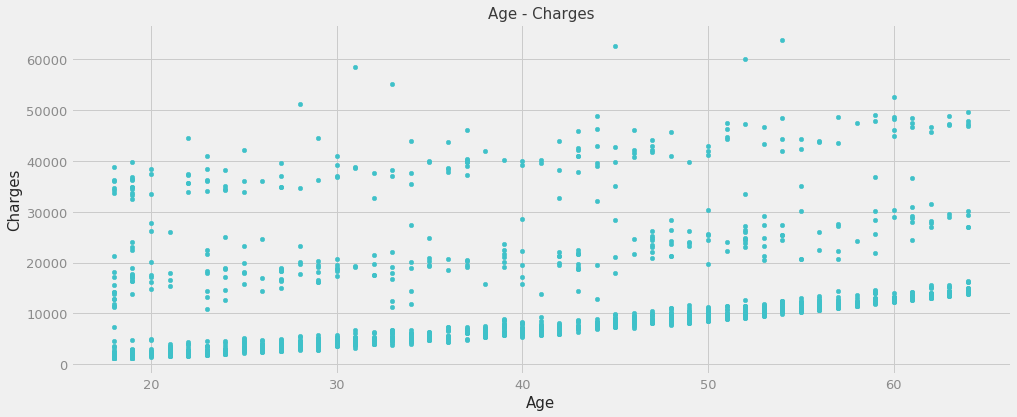

In [0]:
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
fig, ax = plt.subplots(figsize=(15, 5.2))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.plot(ax=ax,kind= 'scatter', x = 'age', y = 'charges', figsize=(15,6), color='#3FC1C9');
plt.xlabel('Age', fontweight='light',fontname="Calibri", fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontname="Calibri", fontsize=15)

#Set xticks label
plt.xticks(fontsize=13, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=13, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Age - Charges', alpha=0.9, fontsize=15);
plt.show()

#The visualization shows that the older a beneficiary is the higher the cost

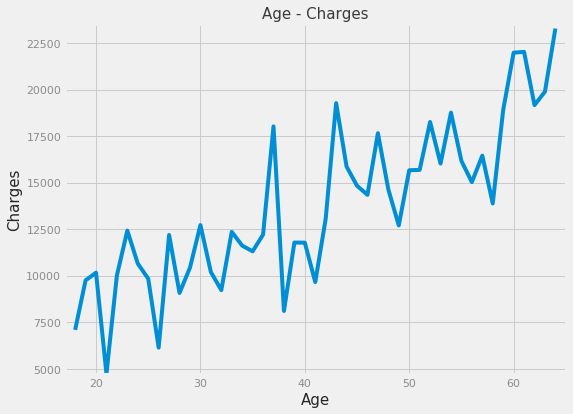

In [0]:
#Age - Charges

fig, ax = plt.subplots(figsize=(8, 7))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.groupby('age')['charges'].mean().plot(figsize=(8,6))
plt.xlabel('Age', fontweight='light',fontname="Calibri", fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontname="Calibri", fontsize=15)
ax.set_xlim(17, 65)
ax.set_ylim(4700, 23500)
#Set xticks label
plt.xticks(fontsize=11, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=11, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Age - Charges', alpha=0.9, fontsize=15);
plt.show()

#The visualization shows that the older a beneficiary is the higher the cost

In [0]:
#sex - charges 

fig, ax = plt.subplots(figsize=(21,11))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = age_charges.plot(ax=ax,kind='bar', figsize=(20,10));
plt.xlabel('Gender', fontweight='light',fontname="Calibri", fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontname="Calibri", fontsize=15)
import matplotlib.patches as mpatches
female_label = mpatches.Patch(color='blue', label='female')
male_label = mpatches.Patch(color='red', label='male')
plt.legend(handles=[female_label, male_label], loc = 'upper center')
#Set the title
ax.set_title('Sex - Age', alpha=0.9, fontsize=15);
plt.show()

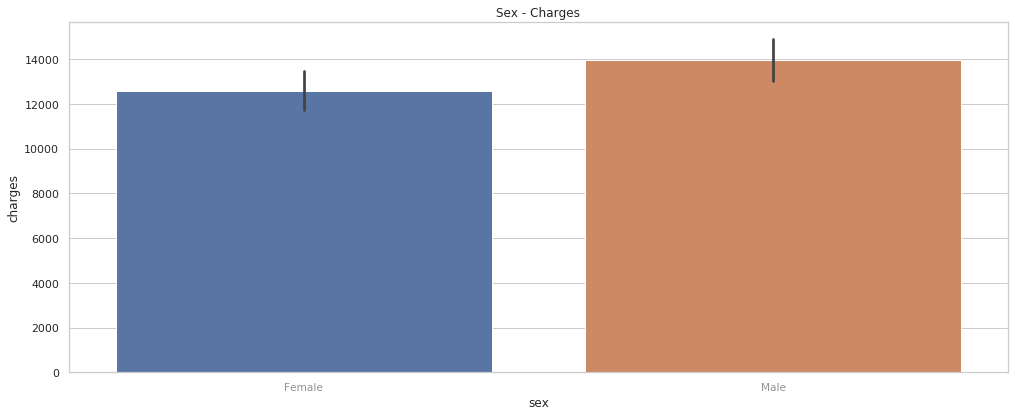

In [95]:
#Sex - Charges

fig, ax = plt.subplots(figsize=(15, 6))
sns.set(style="whitegrid") 
ax = sns.barplot(x="sex", y="charges", data=insurance_df)
ax.set_title('Sex - Charges');
ax.set_xticklabels(('Female', 'Male'), weight='ultralight', fontsize=10.5, alpha=0.5);


#The visualization below shows that the costs are slightly higher for men than women but overall they are pretty much similar

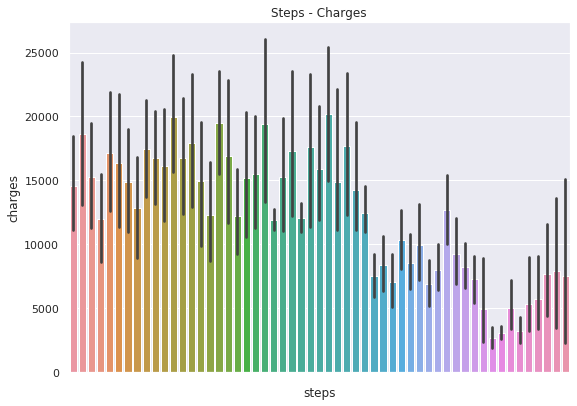

In [0]:
import seaborn as sns; sns.set()
fig, ax = plt.subplots(figsize=(8, 6))
sns.set(style="whitegrid") 
ax = sns.barplot(x="steps", y="charges", data=insurance_df)
ax.set_title('Steps - Charges');
ax.set_xticklabels("");

#The visualization below shows that the more steps a beneficiary takes, the less insurance costs are

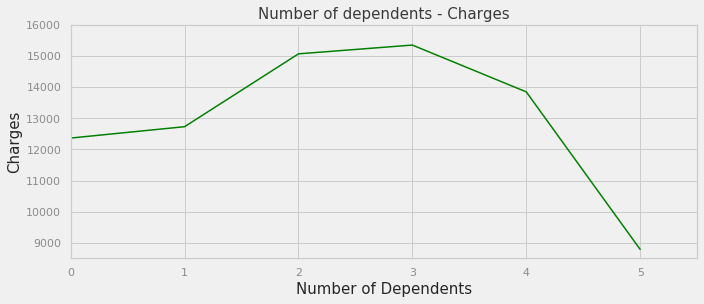

In [97]:
#Children - Charges

fig, ax = plt.subplots(figsize=(8, 7))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.groupby('children')['charges'].mean().plot(figsize=(10,4), color='green');
plt.xlabel('Number of Dependents', fontweight='light',fontname="Calibri", fontsize=15)
plt.ylabel('Charges', fontweight = 'light', fontname="Calibri", fontsize=15)
ax.set_xlim(0,5.5)
ax.set_ylim(8500, 16000)
#Set xticks label
plt.xticks(fontsize=11, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=11, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Number of dependents - Charges', alpha=0.9, fontsize=15);
plt.show()


#The visualization below goes up up to 3 children and then goes down 


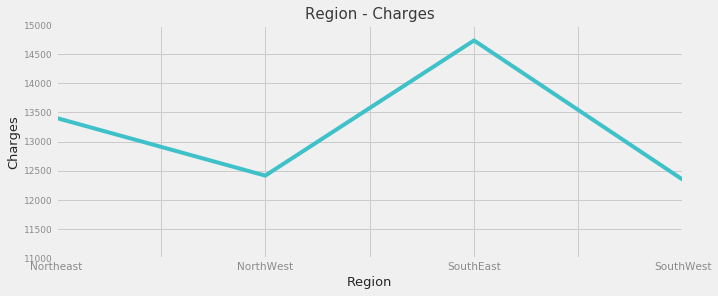

In [0]:
#Region - Charges

fig, ax = plt.subplots(figsize=(8, 7))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = insurance_df.groupby('region')['charges'].mean().plot(figsize=(10,4), color = '#3FC1C9');
plt.xlabel('Region', fontweight='light', fontsize=13)
plt.ylabel('Charges', fontweight = 'light', fontsize=13)
ax.set_xlim(0,3)
ax.set_ylim(11000, 15000)
#Set xticks label
plt.xticks(fontsize=9, weight='ultralight', alpha=0.5)
plt.yticks(fontsize=9, weight='ultralight', alpha=0.5)
#Set the title
ax.set_title('Region - Charges', alpha=0.9, fontsize=15);
#Set xticks label
ax.set_xticklabels(('Northeast', "", 'NorthWest', "", 'SouthEast', "", 'SouthWest'), weight='ultralight', fontsize=10.5, alpha=0.5);
plt.show()

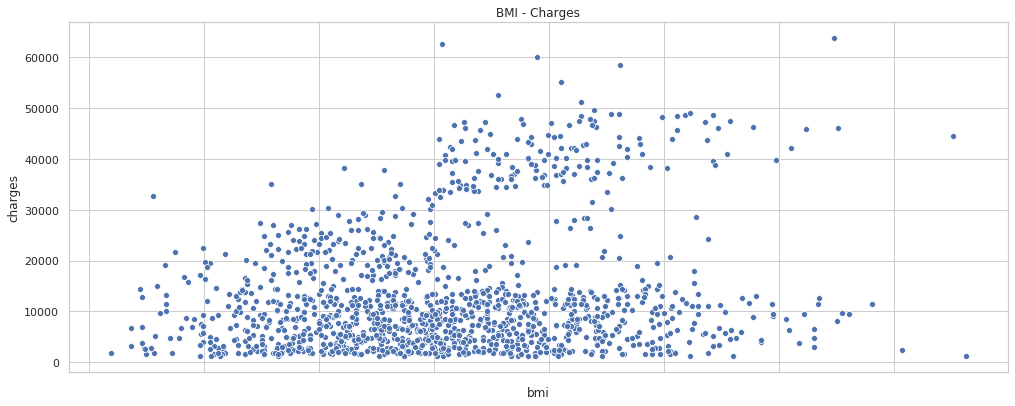

In [0]:
#BMI - Charges

fig, ax = plt.subplots(figsize=(15, 6))
sns.set(style="whitegrid") 
ax = sns.scatterplot(x="bmi", y="charges", data=insurance_df)
ax.set_title('BMI - Charges');
ax.set_xticklabels("");

#The visualization below shows that the higher the BMI of a beneficiary the higher insurance costs are

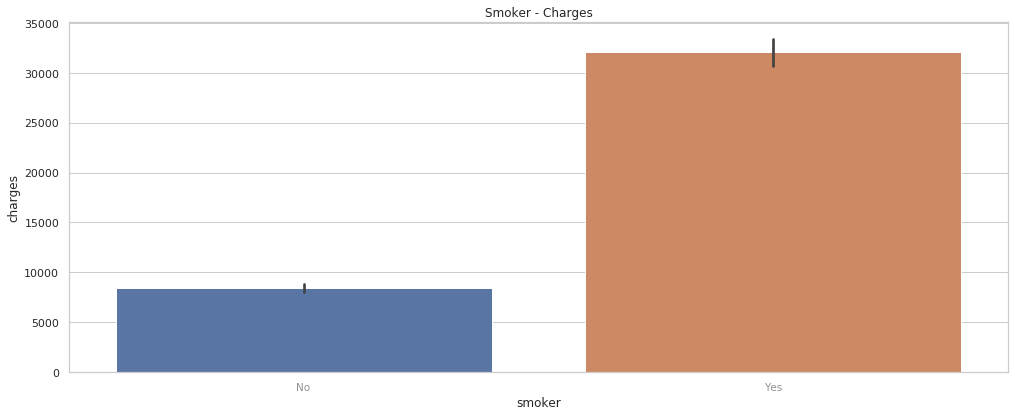

In [0]:
#Smoker - Charges

fig, ax = plt.subplots(figsize=(15, 6))
sns.set(style="whitegrid") 
ax = sns.barplot(x="smoker", y="charges", data=insurance_df)
ax.set_title('Smoker - Charges');
ax.set_xticklabels(('No', 'Yes'), weight='ultralight', fontsize=10.5, alpha=0.5);


#The visualization below shows that smokers are charged a higher cost than non smokers 

In [0]:
insurance_df['bmi']

0       27.900
1       33.770
2       33.000
3       22.705
4       28.880
         ...  
1333    30.970
1334    31.920
1335    36.850
1336    25.800
1337    29.070
Name: bmi, Length: 1338, dtype: float64

In [0]:
age_sex = pd.crosstab(insurance_df['age'], insurance_df['sex'])
age_sex.head()

sex,0,1
age,,
18,33,36
19,33,35
20,14,15
21,13,15
22,13,15


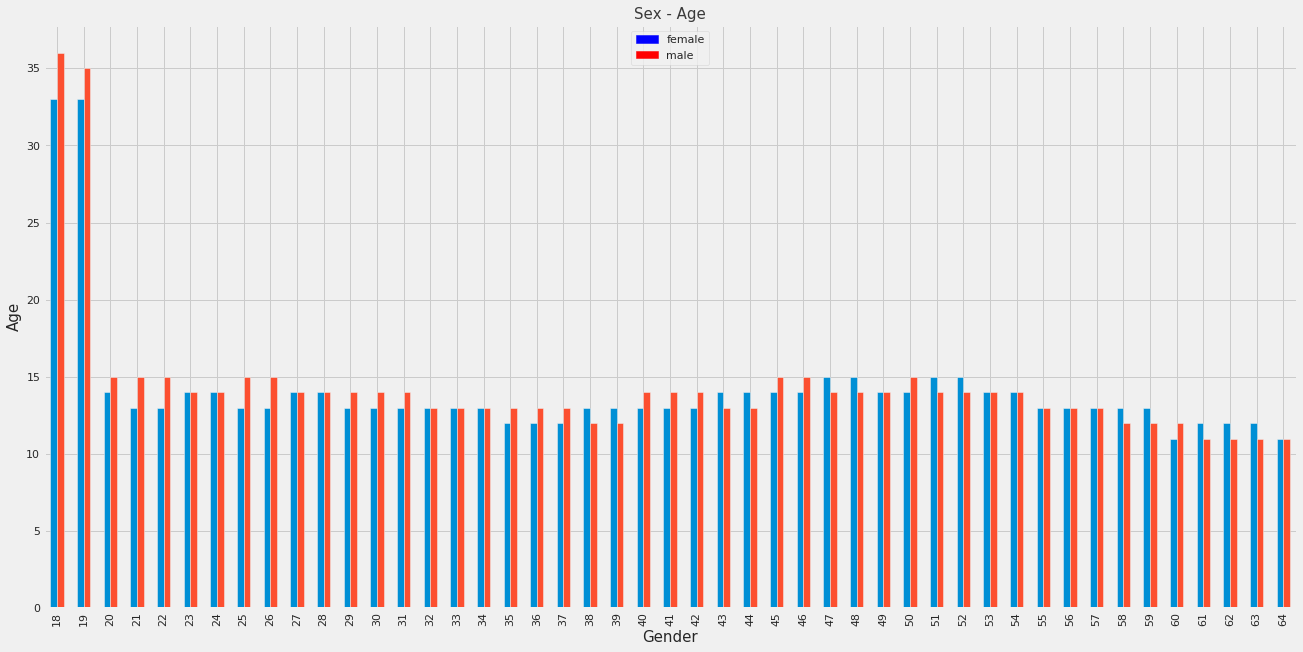

In [0]:
#we have approximately the same ages of men and women meaning that sex will not affect much the cost of the insurance
#we have more of young people enrolled that older people

fig, ax = plt.subplots(figsize=(21,11))
fig.patch.set(facecolor='#F0F0F0')
# Set the line chart
ax.set(facecolor='#F0F0F0') #figure background
ax = age_sex.plot(ax=ax,kind='bar', figsize=(20,10));
plt.xlabel('Gender', fontweight='light',fontname="Calibri", fontsize=15)
plt.ylabel('Age', fontweight = 'light', fontname="Calibri", fontsize=15)
import matplotlib.patches as mpatches
female_label = mpatches.Patch(color='blue', label='female')
male_label = mpatches.Patch(color='red', label='male')
plt.legend(handles=[female_label, male_label], loc = 'upper center')
#Set the title
ax.set_title('Sex - Age', alpha=0.9, fontsize=15);
plt.show()


In [0]:
#find the correlation between age and charges 

age_charges = insurance_df[['age', 'charges']]
age_charges.corr()


#there is a positive correlation between age and charges but it is not big 



,age,charges
age,1.000000,0.299008
charges,0.299008,1.000000


In [0]:
#sex and charges 
sex_charges = insurance_df[['sex', 'charges']]
sex_charges.corr()

#There is a negative small negative correlation between sex and charges meaning that 
# gender does not affect the cost a beneficiary pays 


,sex,charges
sex,1.000000,0.057292
charges,0.057292,1.000000


In [0]:
#bmi and charges 
bmi_charges = insurance_df[['bmi', 'charges']]
bmi_charges.corr()
#there is a positive correlation between bmi and charges but it is not big 


,bmi,charges
bmi,1.000000,0.198341
charges,0.198341,1.000000


In [0]:
#number of children and charges
dependents_charges = insurance_df[['children', 'charges']]
dependents_charges.corr()

#there is a positive correlation between number of dependents and charges but it is not big 


,children,charges
children,1.000000,0.067998
charges,0.067998,1.000000


In [96]:
#steps and charges 
steps_charges = insurance_df[['steps', 'charges']]
steps_charges.corr()

#There is a negative small negative correlation between steps and charges meaning that 
#number of steps do not really affect the cost a beneficiary pays

,steps,charges
steps,1.00000,-0.30557
charges,-0.30557,1.00000


In [0]:
#smoker and charges
smoker_charges = insurance_df[['smoker', 'charges']]
smoker_charges.corr()
#there is a positive correlation between number of smoker and charges, which is pretty high 


,smoker,charges
smoker,1.000000,0.787251
charges,0.787251,1.000000


In [0]:
region_charges = insurance_df[['region', 'charges']]
region_charges.corr()
#negative correlation 


,region,charges
region,1.000000,-0.006208
charges,-0.006208,1.000000


In [0]:
#correlation matrix
corr_matrix = insurance_df.corr()
corr_matrix


,age,sex,bmi,steps,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000


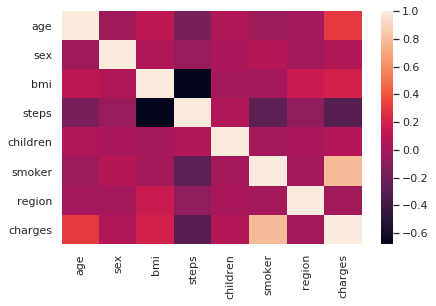

In [0]:
import seaborn as sns
sns.heatmap(insurance_df.corr());